# Avaliação Parcial 01 (2 Ch) - Mineração de Dados

## Questão 01
### Aplique as seguintes etapas de pré-processamento no dataset disponibilizado.

Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###### a)  Verifique se existem valores faltantes nesses dados. Em caso positivo, faça a atribuição da média dos valores na mesma classe para os valores de atributos faltantes.

Lendo os dados e realizando o pré-processamento

In [2]:
dataframe = pd.read_csv('breast_cancer_ap1.csv')

Imprimindo cabeçalho dos dados lidos

In [3]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0,0


Verificando a existência de dados faltantes

In [4]:
dataframe.isna().sum()

0      8
1      4
2     11
3      5
4      5
5      9
6      8
7      3
8     11
9      3
10     5
11    10
12     5
13     9
14     6
15     3
16    10
17     3
18     9
19     3
20    10
21     3
22     5
23     6
24     9
25     5
26     6
27     7
28     6
29     4
30     8
y      0
dtype: int64

Substituindo os dados faltantes pela média dos dados da classe

In [5]:
y = dataframe['y']
dataframe[y == 0] = dataframe[y == 0].fillna(dataframe[y == 0].mean())
dataframe[y == 1] = dataframe[y == 1].fillna(dataframe[y == 1].mean())

Verificando se ainda contém dados faltantes

In [6]:
dataframe.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
y     0
dtype: int64

###### b) Faça uma breve análise exploratória de dados para determinar que atributos (features) possuem maior valor positivo de correlação entre si e que  atributos (features) possuem maior valor negativo de correlação entre si. O que estes valores significam?

In [7]:
X = dataframe.iloc[:,:-1]
y = dataframe.iloc[:,-1]

df = pd.DataFrame(dataframe, columns=dataframe.columns)

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,y
0,17.990000,10.38,122.800000,1001.000000,0.11840,0.27760,0.300100,0.147100,0.241900,0.07871,...,184.60,2019.0,0.16220,0.66560,0.711900,0.26540,0.4601,0.11890,0.0,0
1,20.570000,17.77,132.900000,1326.000000,0.08474,0.07864,0.086900,0.070170,0.181200,0.05667,...,158.80,1956.0,0.12380,0.18660,0.241600,0.18600,0.2750,0.08902,0.0,0
2,19.690000,21.25,130.000000,1203.000000,0.10960,0.15990,0.197400,0.127900,0.206900,0.05999,...,152.50,1709.0,0.14440,0.42450,0.450400,0.24300,0.3613,0.08758,0.0,0
3,11.420000,20.38,77.580000,386.100000,0.14250,0.28390,0.241400,0.105200,0.259700,0.09744,...,98.87,567.7,0.20980,0.86630,0.686900,0.25750,0.6638,0.17300,0.0,0
4,20.290000,14.34,135.100000,1297.000000,0.10030,0.13280,0.198000,0.104300,0.180900,0.05883,...,152.20,1575.0,0.13740,0.20500,0.400000,0.16250,0.2364,0.07678,0.0,0
5,12.450000,15.70,82.570000,477.100000,0.12780,0.17000,0.157800,0.080890,0.208700,0.07613,...,103.40,741.6,0.17910,0.52490,0.535500,0.17410,0.3985,0.12440,0.0,0
6,18.250000,19.98,119.600000,1040.000000,0.09463,0.10900,0.112700,0.074000,0.179400,0.05742,...,153.20,1606.0,0.14420,0.25760,0.378400,0.19320,0.3063,0.08368,0.0,0
7,13.710000,20.83,90.200000,577.900000,0.11890,0.16450,0.161462,0.059850,0.219600,0.07451,...,110.60,897.0,0.16540,0.36820,0.267800,0.15560,0.3196,0.11510,0.0,0
8,13.000000,21.82,87.500000,519.800000,0.12730,0.19320,0.185900,0.093530,0.235000,0.07389,...,106.20,739.3,0.17030,0.54010,0.539000,0.20600,0.4378,0.10720,0.0,0
9,12.460000,24.04,83.970000,475.900000,0.11860,0.23960,0.227300,0.085430,0.203000,0.08243,...,97.65,711.4,0.18530,1.05800,1.105000,0.22100,0.4366,0.20750,0.0,0


In [9]:
corr = df.corr()

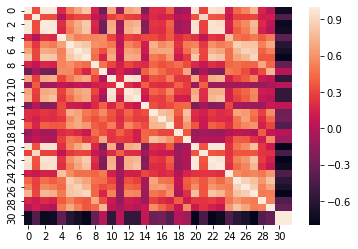

In [10]:
sns.heatmap(corr)

> Os dados acima mostram que as cores mais claras indicam uma maior correlação entre as _features_ enquanto as cores mais escuras indicam uma menor correlação.
>
> Nesse caso, temos como exemplo que as _features_ de número 0 e 2 ou 10 e 11, por exemplo, possuem uma alta correlação, enquanto os de número 0 e 30 ou 22 e 30 possuem uma correlação mais baixa.

###### c) A  padronização   de   conjuntos   de   dados   é   um   requisito   comum   para   muitos   estimadores   de aprendizado de máquina; eles podem se comportar mal se os recursos individuais não parecerem mais ou menos com dados padrão normalmente distribuídos: gaussiano com média zero e variância unitária. Faça a dos dados (Standardization) dos dados, utilizando a função preprocessing.StandardScaler() do scikitlearn. Apresente o resultado do processo de padronização.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

x_transformed = scaler.transform(X)
x_transformed = pd.DataFrame(x_transformed, index=range(0, len(x_transformed)), columns=X.columns)


# X_train_transformed = scaler.transform(X_train)
# X_test_transformed = scaler.transform(X_test)

# X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train_transformed.columns)

In [15]:
x_transformed.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.097461,-2.084450,1.285828,0.979874,1.574463,3.344247,2.648193,2.564693,2.253828,2.258901,...,-1.365701,2.308265,2.003161,1.310013,2.611802,2.136680,2.298278,2.754929,1.946479,-1.297676
1,1.832106,-0.358942,1.705512,1.903866,-0.831046,-0.482792,-0.027975,0.559648,0.008280,-0.874610,...,-0.372890,1.537851,1.892325,-0.376591,-0.432228,-0.142730,1.086131,-0.246606,0.284977,-1.297676
2,1.581530,0.453611,1.585009,1.554171,0.945572,1.080262,1.359063,2.064279,0.959031,-0.402593,...,-0.026712,1.349727,1.457781,0.528202,1.079619,0.869264,1.956312,1.152813,0.204904,-1.297676
3,-0.773320,0.250473,-0.593194,-0.768320,3.296768,3.465429,1.911368,1.472643,2.912325,4.921817,...,0.131680,-0.251718,-0.550097,3.400700,3.887244,2.015512,2.177674,6.058077,4.954754,-1.297676
4,1.752377,-1.159820,1.796929,1.821418,0.280948,0.558988,1.366595,1.449186,-0.002818,-0.567515,...,-1.473473,1.340769,1.222036,0.220748,-0.315296,0.624990,0.727372,-0.872534,-0.395639,-1.297676


## Questão 02
### Crie e treine modelos preditivos para os dados com e sem  Standardization,  usando os seguintes algoritmos: DecisionTreeClassifier e KNearestNeighbors. Utilize hold-out 75/25 (75% do dados paratreino e 25% para teste) com estratificação sobre os rótulos do dataset.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [16]:
# Usando com os dados puros
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Usando com os dados com Standartization
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(x_transformed, y, test_size=0.25, random_state=42, stratify=y)

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
dtc = DecisionTreeClassifier(max_depth=4)

In [19]:
# KNN para dados puros
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [21]:
# KNN para dados 'Standartizados'
knn.fit(X_train_transformed, y_train_transformed)
y_pred_knn_transformed = knn.predict(X_test_transformed)

In [22]:
# DCT para dados puros
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

In [24]:
# DTC para dados 'Standartizados'
dtc.fit(X_train_transformed, y_train_transformed)
y_pred_dtc_transformed = dtc.predict(X_test_transformed)

In [26]:
print('KNN with pure datas score: ', knn.score(X_test, y_test))
print('KNN with "Standartizate" datas score: ', knn.score(X_test_transformed, y_test_transformed))
print('DTC with pure datas score: ', dtc.score(X_test, y_test))
print('DTC with "Standartizate" datas score: ', dtc.score(X_test_transformed, y_test_transformed))

KNN with pure datas score:  0.3706293706293706
KNN with "Standartizate" datas score:  1.0
DTC with pure datas score:  0.6293706293706294
DTC with "Standartizate" datas score:  1.0


## Questão 03
### Implemente uma função para calcular a acurácia, usando somente Python e/ou NumPy, mas sem usar a biblioteca  scikit-learn. A função deve receber como parâmetros  y_real (array com rótulos reais) e y_predito (array com rótulos preditos). Utilize sua implementação para calcular a acurácia  e mostrar o valor da acurácia para cada algoritmo sobre

In [29]:
def acc(y_real, y_predicted):
    equals = 0
    size_of_y_ = len(y_real)
    
    y_real = np.array(y_real)
    y_predicted = np.array(y_predicted)
    
    for i in range(0, size_of_y_):
        if(y_real[i] == y_predicted[i]):
            equals += 1
            
    return equals/size_of_y_

###### a) usando  com conjunto de treino e o conjunto de teste não padronizado

In [30]:
# Para algoritmo KNN com dados não padronizados
print('Accuracy KNN: ', acc(y_test, y_pred_knn))

# Para algoritmo DTC com dados padronizados
print('Accuracy DTC: ', acc(y_test, y_pred_dtc))

Accuracy KNN:  0.9300699300699301
Accuracy DTC:  1.0


###### b) usando  com conjunto de treino e o conjunto de teste padronizado

In [31]:
# Para algoritmo KNN com dados não padronizados
print('Accuracy KNN: ', acc(y_test, y_pred_knn_transformed))

# Para algoritmo DTC com dados padronizados
print('Accuracy DTC: ', acc(y_test, y_pred_dtc_transformed))

Accuracy KNN:  1.0
Accuracy DTC:  1.0


###### c) Qual algoritmo apresentou a pior e a melhor acurácia? Qual conjunto de dados apresentou apior e a melhor acurácia? Ocorreu overfitting em seus resultados? Explique sua resposta.

> O algoritmo que apresentou a melhor acurácia foi o KNN para os dados puros. 
>
> Não houve um com uma pior acurácia
>
> As demais formas foi possível perceber que o modelo ajustou-se demais aos dados de teste e acabou acontecendo um overfitting, ou seja, não foi viável para o problema proposto

## Questão 04
### Ainda para o mesmo dataset, utilize o algortimo de clusterização K-Means para obter clusters. Suponha que você desconheça o número de classes desse problema. Apresente um código que determine como pode ser escolhido o valor de K utilizando alguma métrica de avaliação da clusterização

In [32]:
from sklearn.cluster import KMeans

In [36]:
def kmeans(X, y):
    
    acc = []
    
    for i in range(1, 30):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X, y)
        acc.append(kmeans.inertia_)
        
    return acc

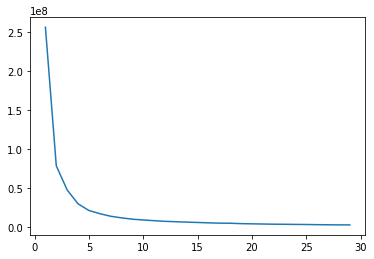

In [37]:
# Analizando e visualizando um possível valor para o número de clusters para os dados puros
plt.plot(range(1, 30), kmeans(X, y))

> Com o gráfico acima é possível perceber que o número de cluster está compreendido entre o número 2 e o número 3, que é onde a linha começa um decaimento mais acentuado

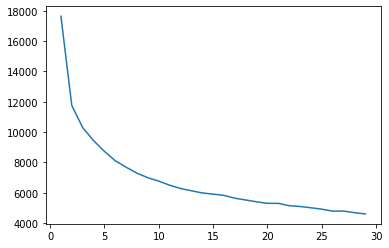

In [38]:
# Analizando e visualizando um possível valor para o número de clusters para os dados modificados
plt.plot(range(1,30), kmeans(x_transformed, y), )

> Com o gráfico acima é possível perceber que o número de cluster está compreendido entre o número 2 e o número 3, que é onde a linha começa um decaimento mais acentuado, assim como no anterior